### EL5206-1: Laboratorio de Inteligencia Computacional y Robótica
## Laboratorio 2: Procesamiento de Imágenes

Integrantes:

*   Leslie Cárdenas
*   Matías Guzmán

# Introducción

Este laboratorio tiene como objetivo implementar y analizar algoritmos simples de clasificación en células sanguíneas. Para lograrlo, primero se implementa un algoritmo de análisis de textura LBP (Local Binary Patterns), posteriormente, se usa este mismo en un set de imágenes de células. Las imagenes procesadas se comparan con un set de datos de prueba para analizar los resultados, la forma de medir la diferencia es con respecto a una métrica que se hace entrega en el enunciado del laboratorio. 


Importamos librerias útiles para el proceso y visualización de imágenes en `python`.

In [2]:
import numpy as np
import cv2
import math
import matplotlib.pyplot as plt

# Parte 1

Confeccionamos el algoritmo de análisis de textura LBP usando una matriz de 3x3.

In [3]:
def lbp(img):
    img_bn = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    emp = np.zeros(img_bn.shape)    
    for i in range(1, img_bn.shape[0]-1):
        for j in range(1, img_bn.shape[1]-1):
            # A cada pixel le aplicamos el algoritmo
            emp[i ,j] = calculo3x3(img_bn[i-1:i+2, j-1:j+2])
    
    # Extendemos los valores de los bordes para rellenar los 0
    emp[0,:] = emp[1,:]
    emp[img_bn.shape[0]-1,:] = emp[img_bn.shape[0]-2,:]
    emp[:,0] = emp[:,1]
    emp[:, img_bn.shape[1]-1] = emp[:, img_bn.shape[1]-2]
    return emp


def calculo3x3(img):
    px = img[1,1]
    mask = [128, 64, 32, 1, 0, 16, 2, 4, 8]
    arr = []
    for i in range(3):
        for j in range(3):
            if img[i, j] < px:
                arr.append(0)
            else:
                arr.append(1)
    # Multiplicamos por la mascara:
    n_pix =0
    for k in range(len(arr)):
        n_pix += arr[k] * mask[k]
    return n_pix

Ahora, aplicamos el algoritmo a todas las imágenes

In [4]:
cell_test_LBP = []
cell_test = []
for i in range(1,9):
    img = cv2.imread(f"cell_test/I{i}_test.jpg")
    cell_test.append(img)
    img = lbp(img)
    cell_test_LBP.append(img)

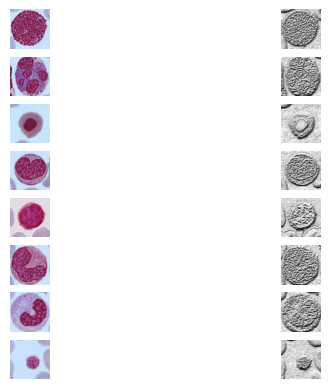

In [15]:
fig, axs = plt.subplots(8, 2)

for i in range(8):
    axs[i, 0].imshow(cell_test[i])
    axs[i, 0].axis("off")
    axs[i, 1].imshow(cell_test_LBP[i], cmap="gray")
    axs[i, 1].axis("off")

Las imagenes con LBP permiten que cada pixel contenga información de su vecindad inmediata

# Parte 2



In [76]:
def hist(img):
    a=((img.shape[0])-100)
    b=((img.shape[1])-100)
    n = int(math.sqrt(25)) #aproximar al entero menor

    caract = []
    for i in range(n):
        for j in range(n):
            img_100 = img[i*80:i*80+100,j*80:j*80+100]
            histogram, _ = np.histogram(img_100, bins=89, range = (0,255)) #problema: los bins se ajustan a cada imagen, no es comun
            caract.append(histogram)
    return np.reshape(caract, (1,-1))[0]            


Parte 3

In [37]:
def dist_vect(v1, v2):
    d = 0
    for i in range(len(v1)):
        d+= abs(v1[i]-v2[i])
    return d


Parte 4

In [81]:
n_gal=8
gal_caract=[]
for i in range(1,n_gal+1):
    name = 'cell_gal/I'+str(i)+'_gal.jpg'
    img = cv2.imread(name)
    img_lbp = lbp(img)
    v = hist(img_lbp)
    gal_caract.append(v)
np.save('gal_caract.npy', gal_caract)


Parte 5

In [82]:
n_test=8
test_caract=[]
for i in range(1,n_test+1):
    name = 'cell_test/I'+str(i)+'_test.jpg'
    img = cv2.imread(name)
    img_lbp = lbp(img)
    v = hist(img_lbp)
    test_caract.append(v)
np.save('test_caract.npy', test_caract)

In [93]:
for i in range(n_test):
    print('Para imagen I'+str(i+1)+'_test')
    for j in range(n_gal):
        v_test = test_caract[i]
        v_gal = gal_caract[j]
        d = dist_vect(v_test, v_gal)
        print('\tComparado con I'+str(j+1)+'_gal: '+str(d))


Para imagen I1_test
	Comparado con I1_gal:143056
	Comparado con I2_gal:192476
	Comparado con I3_gal:343714
	Comparado con I4_gal:226802
	Comparado con I5_gal:250386
	Comparado con I6_gal:181522
	Comparado con I7_gal:271114
	Comparado con I8_gal:338666
Para imagen I2_test
	Comparado con I1_gal:208060
	Comparado con I2_gal:142860
	Comparado con I3_gal:338730
	Comparado con I4_gal:244518
	Comparado con I5_gal:274874
	Comparado con I6_gal:199632
	Comparado con I7_gal:268304
	Comparado con I8_gal:326192
Para imagen I3_test
	Comparado con I1_gal:356956
	Comparado con I2_gal:356624
	Comparado con I3_gal:321676
	Comparado con I4_gal:368002
	Comparado con I5_gal:366962
	Comparado con I6_gal:351172
	Comparado con I7_gal:357972
	Comparado con I8_gal:394902
Para imagen I4_test
	Comparado con I1_gal:215096
	Comparado con I2_gal:230418
	Comparado con I3_gal:337928
	Comparado con I4_gal:236702
	Comparado con I5_gal:270426
	Comparado con I6_gal:206952
	Comparado con I7_gal:276730
	Comparado con I8_gal